### 1. 서울시 구별 CCTV 현황 분석
<hr/>

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl  
from matplotlib import font_manager, rc
%matplotlib inline

In [2]:
plt.style.use('ggplot')  
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()  
rc('font', family=font_name)  
mpl.rcParams['axes.unicode_minus'] = False

In [1]:
import numpy as np

In [2]:
import pandas as pd

CCTV_Seoul = pd.read_csv('data/01. CCTV_in_Seoul.csv')
CCTV_Seoul.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [5]:
CCTV_Seoul.columns

Index(['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

In [6]:
CCTV_Seoul.columns[0]

'기관명'

    inplace=True or False
실제 데이터에 내용을 갱신

In [7]:
CCTV_Seoul.rename(columns={CCTV_Seoul.columns[0] : '구별'}, inplace=True)
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [8]:
pop_Seoul = pd.read_excel('data/01. population_in_Seoul.xls')
pop_Seoul.head()

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2017.1/4,합계,4202888,10197604,5000005,5197599,9926968,4871560,5055408,270636,128445,142191,2.36,1321458
3,2017.1/4,종로구,72654,162820,79675,83145,153589,75611,77978,9231,4064,5167,2.11,25425
4,2017.1/4,중구,59481,133240,65790,67450,124312,61656,62656,8928,4134,4794,2.09,20764


    parse_cols >> usecols = 'B, D, G, J, N
excel에서 B, D, G, J, N 열을 선택  

In [9]:
pop_Seoul = pd.read_excel('data/01. population_in_Seoul.xls', header=2, parse_cols= 'B, D, G, J, N')
pop_Seoul.head()

C:\Users\Q\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: the 'parse_cols' keyword is deprecated, use 'usecols' instead
  """Entry point for launching an IPython kernel.


,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [10]:
pop_Seoul = pd.read_excel('data/01. population_in_Seoul.xls', header=2, usecols= 'B, D, G, J, N')
pop_Seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [11]:
pop_Seoul.rename(columns={pop_Seoul.columns[0] : '구별',
                         pop_Seoul.columns[1] : '인구수',
                         pop_Seoul.columns[2] : '한국인',
                         pop_Seoul.columns[3] : '외국인',
                         pop_Seoul.columns[4] : '고령자',}, inplace= True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [12]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [13]:
dates = pd.date_range('20130101', periods= 6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [14]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
2013-01-01,1.147497,-0.291216,1.005383,0.176808
2013-01-02,2.969597,-1.746843,0.347673,-0.162586
2013-01-03,1.804956,0.450856,0.097778,0.072218
2013-01-04,-0.210347,-0.421487,-1.024690,-0.135167
2013-01-05,-0.837439,-0.890529,-1.248192,0.236381
2013-01-06,0.617766,0.150044,-1.044031,-2.027130


In [15]:
df.head(3)

,A,B,C,D
2013-01-01,1.147497,-0.291216,1.005383,0.176808
2013-01-02,2.969597,-1.746843,0.347673,-0.162586
2013-01-03,1.804956,0.450856,0.097778,0.072218


In [16]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [17]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [18]:
df.values

array([[ 1.14749739, -0.29121571,  1.00538325,  0.17680765],
       [ 2.96959695, -1.746843  ,  0.34767253, -0.1625859 ],
       [ 1.80495568,  0.45085637,  0.09777838,  0.07221805],
       [-0.21034707, -0.42148718, -1.02468954, -0.13516686],
       [-0.8374391 , -0.89052855, -1.24819204,  0.23638131],
       [ 0.61776632,  0.15004355, -1.04403102, -2.02713026]])

In [19]:
df.info

<bound method DataFrame.info of                    A         B         C         D
2013-01-01  1.147497 -0.291216  1.005383  0.176808
2013-01-02  2.969597 -1.746843  0.347673 -0.162586
2013-01-03  1.804956  0.450856  0.097778  0.072218
2013-01-04 -0.210347 -0.421487 -1.024690 -0.135167
2013-01-05 -0.837439 -0.890529 -1.248192  0.236381
2013-01-06  0.617766  0.150044 -1.044031 -2.027130>

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6 entries, 2013-01-01 to 2013-01-06
Freq: D
Data columns (total 4 columns):
A    6 non-null float64
B    6 non-null float64
C    6 non-null float64
D    6 non-null float64
dtypes: float64(4)
memory usage: 240.0 bytes


In [21]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.915338,-0.458196,-0.311013,-0.306579
std,1.377914,0.783975,0.922912,0.858180
min,-0.837439,-1.746843,-1.248192,-2.027130
25%,-0.003319,-0.773268,-1.039196,-0.155731
50%,0.882632,-0.356351,-0.463456,-0.031474
75%,1.640591,0.039729,0.285199,0.150660
max,2.969597,0.450856,1.005383,0.236381


In [22]:
df.sort_values(by='B', ascending=False)

,A,B,C,D
2013-01-03,1.804956,0.450856,0.097778,0.072218
2013-01-06,0.617766,0.150044,-1.044031,-2.027130
2013-01-01,1.147497,-0.291216,1.005383,0.176808
2013-01-04,-0.210347,-0.421487,-1.024690,-0.135167
2013-01-05,-0.837439,-0.890529,-1.248192,0.236381
2013-01-02,2.969597,-1.746843,0.347673,-0.162586


In [23]:
df

,A,B,C,D
2013-01-01,1.147497,-0.291216,1.005383,0.176808
2013-01-02,2.969597,-1.746843,0.347673,-0.162586
2013-01-03,1.804956,0.450856,0.097778,0.072218
2013-01-04,-0.210347,-0.421487,-1.024690,-0.135167
2013-01-05,-0.837439,-0.890529,-1.248192,0.236381
2013-01-06,0.617766,0.150044,-1.044031,-2.027130


In [24]:
df['A']

2013-01-01    1.147497
2013-01-02    2.969597
2013-01-03    1.804956
2013-01-04   -0.210347
2013-01-05   -0.837439
2013-01-06    0.617766
Freq: D, Name: A, dtype: float64

In [25]:
df[0:3]

,A,B,C,D
2013-01-01,1.147497,-0.291216,1.005383,0.176808
2013-01-02,2.969597,-1.746843,0.347673,-0.162586
2013-01-03,1.804956,0.450856,0.097778,0.072218


In [26]:
df.loc[dates[0]]

A    1.147497
B   -0.291216
C    1.005383
D    0.176808
Name: 2013-01-01 00:00:00, dtype: float64

In [27]:
df.loc[:,['A','B']]

,A,B
2013-01-01,1.147497,-0.291216
2013-01-02,2.969597,-1.746843
2013-01-03,1.804956,0.450856
2013-01-04,-0.210347,-0.421487
2013-01-05,-0.837439,-0.890529
2013-01-06,0.617766,0.150044


In [28]:
df.loc['20130102':'20130104', ['A','B']]

,A,B
2013-01-02,2.969597,-1.746843
2013-01-03,1.804956,0.450856
2013-01-04,-0.210347,-0.421487


In [29]:
df.loc['20130102',['A', 'B']]

A    2.969597
B   -1.746843
Name: 2013-01-02 00:00:00, dtype: float64

In [30]:
df.loc[dates[0], 'A']

1.1474973939171673

In [31]:
df.iloc[3]

A   -0.210347
B   -0.421487
C   -1.024690
D   -0.135167
Name: 2013-01-04 00:00:00, dtype: float64

In [32]:
df.iloc[3:5, 0:2]

,A,B
2013-01-04,-0.210347,-0.421487
2013-01-05,-0.837439,-0.890529


In [33]:
df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,2.969597,0.347673
2013-01-03,1.804956,0.097778
2013-01-05,-0.837439,-1.248192


In [34]:
df.iloc[1:3,:]

,A,B,C,D
2013-01-02,2.969597,-1.746843,0.347673,-0.162586
2013-01-03,1.804956,0.450856,0.097778,0.072218


In [35]:
df.iloc[:, 1:3]

,B,C
2013-01-01,-0.291216,1.005383
2013-01-02,-1.746843,0.347673
2013-01-03,0.450856,0.097778
2013-01-04,-0.421487,-1.024690
2013-01-05,-0.890529,-1.248192
2013-01-06,0.150044,-1.044031


In [36]:
df

,A,B,C,D
2013-01-01,1.147497,-0.291216,1.005383,0.176808
2013-01-02,2.969597,-1.746843,0.347673,-0.162586
2013-01-03,1.804956,0.450856,0.097778,0.072218
2013-01-04,-0.210347,-0.421487,-1.024690,-0.135167
2013-01-05,-0.837439,-0.890529,-1.248192,0.236381
2013-01-06,0.617766,0.150044,-1.044031,-2.027130


In [37]:
df[df.A>0]

,A,B,C,D
2013-01-01,1.147497,-0.291216,1.005383,0.176808
2013-01-02,2.969597,-1.746843,0.347673,-0.162586
2013-01-03,1.804956,0.450856,0.097778,0.072218
2013-01-06,0.617766,0.150044,-1.044031,-2.027130


In [38]:
df[df>0]

,A,B,C,D
2013-01-01,1.147497,NaN,1.005383,0.176808
2013-01-02,2.969597,NaN,0.347673,NaN
2013-01-03,1.804956,0.450856,0.097778,0.072218
2013-01-04,NaN,NaN,NaN,NaN
2013-01-05,NaN,NaN,NaN,0.236381
2013-01-06,0.617766,0.150044,NaN,NaN


In [39]:
df2 = df.copy()
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three']
df2

,A,B,C,D,E
2013-01-01,1.147497,-0.291216,1.005383,0.176808,one
2013-01-02,2.969597,-1.746843,0.347673,-0.162586,one
2013-01-03,1.804956,0.450856,0.097778,0.072218,two
2013-01-04,-0.210347,-0.421487,-1.024690,-0.135167,three
2013-01-05,-0.837439,-0.890529,-1.248192,0.236381,four
2013-01-06,0.617766,0.150044,-1.044031,-2.027130,three


In [40]:
df2['E'].isin(['two', 'four'])

2013-01-01    False
2013-01-02    False
2013-01-03     True
2013-01-04    False
2013-01-05     True
2013-01-06    False
Freq: D, Name: E, dtype: bool

In [41]:
df2[df2['E'].isin(['two', 'four'])]

,A,B,C,D,E
2013-01-03,1.804956,0.450856,0.097778,0.072218,two
2013-01-05,-0.837439,-0.890529,-1.248192,0.236381,four


In [42]:
df

,A,B,C,D
2013-01-01,1.147497,-0.291216,1.005383,0.176808
2013-01-02,2.969597,-1.746843,0.347673,-0.162586
2013-01-03,1.804956,0.450856,0.097778,0.072218
2013-01-04,-0.210347,-0.421487,-1.024690,-0.135167
2013-01-05,-0.837439,-0.890529,-1.248192,0.236381
2013-01-06,0.617766,0.150044,-1.044031,-2.027130


    np.cumsum
누적합계

In [43]:
df.apply(np.cumsum)

,A,B,C,D
2013-01-01,1.147497,-0.291216,1.005383,0.176808
2013-01-02,4.117094,-2.038059,1.353056,0.014222
2013-01-03,5.922050,-1.587202,1.450834,0.086440
2013-01-04,5.711703,-2.008690,0.426145,-0.048727
2013-01-05,4.874264,-2.899218,-0.822047,0.187654
2013-01-06,5.492030,-2.749175,-1.866078,-1.839476


In [44]:
df.apply(lambda x: x.max() - x.min())

A    3.807036
B    2.197699
C    2.253575
D    2.263512
dtype: float64

In [45]:
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [46]:
CCTV_Seoul.sort_values(by='소계', ascending=True).head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,485,238,159,42,386
12,마포구,574,314,118,169,379
17,송파구,618,529,21,68,463
24,중랑구,660,509,121,177,109
23,중구,671,413,190,72,348


In [47]:
CCTV_Seoul['최근증가율'] = (CCTV_Seoul['2016년'] + 
                       CCTV_Seoul['2015년'] + 
                       CCTV_Seoul['2014년']) / CCTV_Seoul['2013년도 이전'] * 100
CCTV_Seoul.sort_values(by= '최근증가율', ascending=False).head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1002,464,314,211,630,248.922414
9,도봉구,485,238,159,42,386,246.638655
12,마포구,574,314,118,169,379,212.101911
8,노원구,1265,542,57,451,516,188.929889
1,강동구,773,379,99,155,377,166.490765


In [48]:
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [49]:
pop_Seoul.drop([0], inplace=True)

In [50]:
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0


In [51]:
pop_Seoul['구별'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구', nan],
      dtype=object)

In [52]:
pop_Seoul[pop_Seoul['구별'].isnull()]

,구별,인구수,한국인,외국인,고령자
26,NaN,NaN,NaN,NaN,NaN


In [53]:
pop_Seoul.drop([26], inplace=True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0


In [54]:
pop_Seoul['외국인비율'] = pop_Seoul['외국인'] / pop_Seoul['인구수'] * 100
pop_Seoul['고령자비율'] = pop_Seoul['고령자'] / pop_Seoul['인구수'] * 100
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
4,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689
5,광진구,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849


In [55]:
pop_Seoul.sort_values(by = '인구수', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
23,강남구,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [56]:
pop_Seoul.sort_values(by = '외국인비율', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427


In [57]:
pop_Seoul.sort_values(by = '외국인', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291
6,동대문구,369496.0,354079.0,15417.0,54173.0,4.172440,14.661322


In [58]:
pop_Seoul.sort_values(by = '고령자비율', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
13,서대문구,327163.0,314982.0,12181.0,48161.0,3.723221,14.720797


In [59]:
pop_Seoul.sort_values(by = '고령자', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
12,은평구,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [60]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'], 
                    'B': ['B0', 'B1', 'B2', 'B3'],
                    'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']},
                   index=[0, 1, 2, 3])

df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                    'B': ['B4', 'B5', 'B6', 'B7'],
                    'C': ['C4', 'C5', 'C6', 'C7'],
                    'D': ['D4', 'D5', 'D6', 'D7']},
                   index=[4, 5, 6, 7])

df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                    'B': ['B8', 'B9', 'B10', 'B11'],
                    'C': ['C8', 'C9', 'C10', 'C11'],
                    'D': ['D8', 'D9', 'D10', 'D11']},
                   index=[8, 9, 10, 11])

In [61]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [62]:
df2

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [63]:
df3

,A,B,C,D
8,A8,B8,C8,D8
9,A9,B9,C9,D9
10,A10,B10,C10,D10
11,A11,B11,C11,D11


In [64]:
result = pd.concat([df1, df2, df3])
result

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


keys = rowNames

In [65]:
result = pd.concat([df1, df2, df3], keys=['x', 'y','z'])
result

A    B    C    D
x 0    A0   B0   C0   D0
  1    A1   B1   C1   D1
  2    A2   B2   C2   D2
  3    A3   B3   C3   D3
y 4    A4   B4   C4   D4
  5    A5   B5   C5   D5
  6    A6   B6   C6   D6
  7    A7   B7   C7   D7
z 8    A8   B8   C8   D8
  9    A9   B9   C9   D9
  10  A10  B10  C10  D10
  11  A11  B11  C11  D11

In [66]:
result.index

MultiIndex(levels=[['x', 'y', 'z'], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]],
           codes=[[0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]])

In [67]:
result.index.get_level_values(0)

Index(['x', 'x', 'x', 'x', 'y', 'y', 'y', 'y', 'z', 'z', 'z', 'z'], dtype='object')

In [68]:
result.index.get_level_values(1)

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], dtype='int64')

In [69]:
df4 = pd.DataFrame({'B': ['B2', 'B3', 'B6', 'B7'], 
                    'D': ['D2', 'D3', 'D6', 'D7'],
                    'F': ['F2', 'F3', 'F6', 'F7']},
                   index=[2, 3, 6, 7])
result = pd.concat([df1, df4], axis=1)
df4

,B,D,F
2,B2,D2,F2
3,B3,D3,F3
6,B6,D6,F6
7,B7,D7,F7


In [70]:
result

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3
6,NaN,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,NaN,B7,D7,F7


In [71]:
result = pd.concat([df1, df4], axis= 1, join='inner')
result

,A,B,C,D,B,D,F
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


In [72]:
result = pd.concat([df1, df4], axis= 1, join_axes=[df1.index])
result

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


In [73]:
result = pd.concat([df1, df4], axis= 0, sort=False)
result

,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
2,NaN,B2,NaN,D2,F2
3,NaN,B3,NaN,D3,F3
6,NaN,B6,NaN,D6,F6
7,NaN,B7,NaN,D7,F7


In [74]:
result = pd.concat([df1, df4], ignore_index=True, sort=False)
result

,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
4,NaN,B2,NaN,D2,F2
5,NaN,B3,NaN,D3,F3
6,NaN,B6,NaN,D6,F6
7,NaN,B7,NaN,D7,F7


In [75]:
left = pd.DataFrame({'key': ['K0', 'K4', 'K2', 'K3'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})

right = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                      'C': ['C0', 'C1', 'C2', 'C3'],
                      'D': ['D0', 'D1', 'D2', 'D3']})
left

,key,A,B
0,K0,A0,B0
1,K4,A1,B1
2,K2,A2,B2
3,K3,A3,B3


In [76]:
right

,key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K3,C3,D3


In [77]:
pd.merge(left, right, on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A2,B2,C2,D2
2,K3,A3,B3,C3,D3


In [78]:
pd.merge(left, right, how='left', on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K4,A1,B1,NaN,NaN
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [79]:
pd.merge(left, right, how='right', on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A2,B2,C2,D2
2,K3,A3,B3,C3,D3
3,K1,NaN,NaN,C1,D1


In [80]:
pd.merge(left, right, how='outer', on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K4,A1,B1,NaN,NaN
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3
4,K1,NaN,NaN,C1,D1


In [81]:
pd.merge(left, right, how='inner', on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A2,B2,C2,D2
2,K3,A3,B3,C3,D3


In [82]:
data_result = pd.merge(CCTV_Seoul, pop_Seoul, on = '구별')
data_result.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,1292,430,584,932,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,379,99,155,377,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,369,120,138,204,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,388,258,184,81,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,846,260,390,613,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [83]:
del data_result['2013년도 이전']
del data_result['2014년']
del data_result['2015년']
del data_result['2016년']
data_result.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [84]:
data_result.set_index('구별', inplace=True)
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


corrcoef 상관관계 확인

df.corr(method = 'pearson')

In [85]:
np.corrcoef(data_result['고령자비율'], data_result['소계'])

array([[ 1.        , -0.28078554],
       [-0.28078554,  1.        ]])

In [86]:
np.corrcoef(data_result['외국인비율'], data_result['소계'])

array([[ 1.        , -0.13607433],
       [-0.13607433,  1.        ]])

In [87]:
np.corrcoef(data_result['인구수'], data_result['소계'])

array([[1.        , 0.30634228],
       [0.30634228, 1.        ]])

In [88]:
data_result.sort_values(by='소계', ascending=False).head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
양천구,2034,34.671731,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964
서초구,1930,63.371266,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308
은평구,1873,85.237258,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019
용산구,1624,53.216374,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427


In [89]:
data_result.sort_values(by='인구수', ascending=False).head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
송파구,618,104.347826,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
노원구,1265,188.929889,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


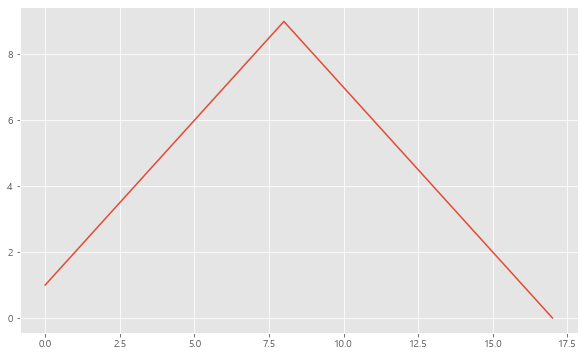

In [90]:
plt.figure(figsize=(10, 6))
plt.plot([1,2,3,4,5,6,7,8,9,8,7,6,5,4,3,2,1,0])
plt.show()

In [91]:
t = np.arange(0, 12, 0.01)
y = np.sin(t)

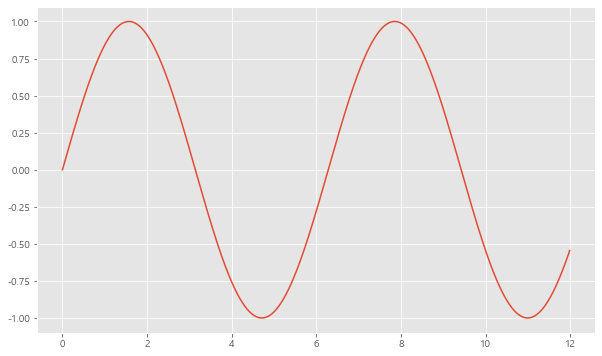

In [92]:
plt.figure(figsize=(10, 6))
plt.plot(t, y)
plt.show()

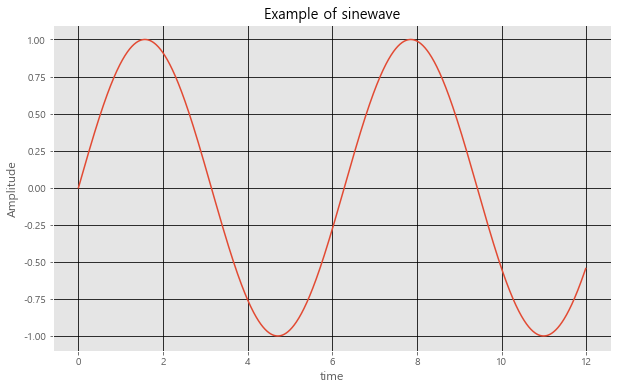

In [93]:
plt.figure(figsize=(10, 6))
plt.plot(t, y)
plt.grid(c='black')
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('Example of sinewave')
plt.show()

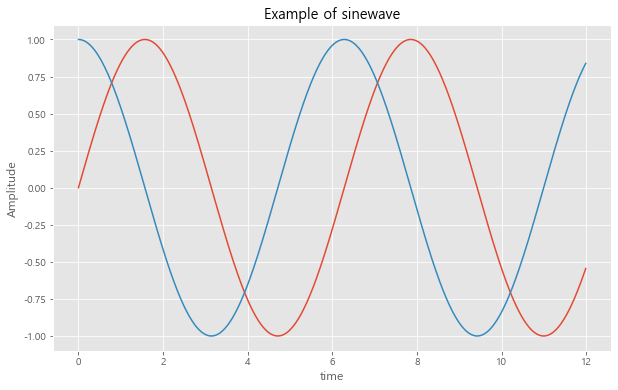

In [94]:
plt.figure(figsize=(10, 6))
plt.plot(t, np.sin(t))
plt.plot(t, np.cos(t))
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('Example of sinewave')
plt.show()

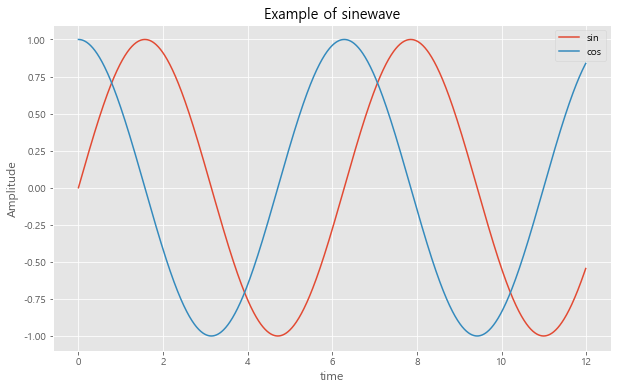

In [95]:
plt.figure(figsize=(10, 6))
plt.plot(t, np.sin(t), label = 'sin')
plt.plot(t, np.cos(t), label = 'cos')
plt.legend(loc = 0)
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('Example of sinewave')
plt.show()

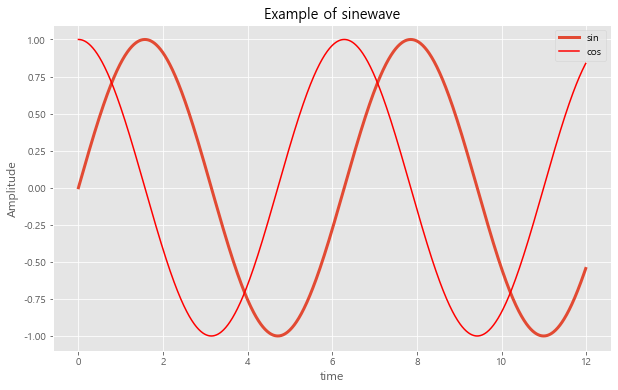

In [96]:
plt.figure(figsize=(10, 6))
plt.plot(t, np.sin(t), lw = 3, label = 'sin')
plt.plot(t, np.cos(t), 'r', label = 'cos')
plt.legend(loc = 0)
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('Example of sinewave')
plt.show()

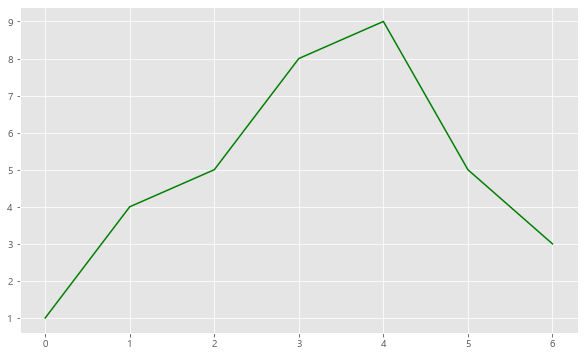

In [97]:
t = [0, 1, 2, 3, 4, 5, 6]
y = [1, 4, 5, 8, 9, 5, 3]
plt.figure(figsize=(10, 6))
plt.plot(t, y, color = 'green')
plt.show()

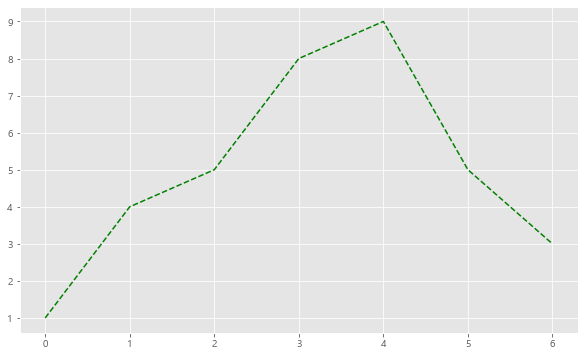

In [98]:
plt.figure(figsize=(10, 6))
plt.plot(t, y, color = 'green', linestyle = 'dashed')
plt.show()

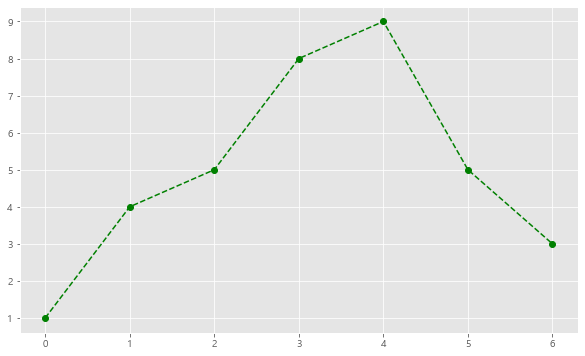

In [99]:
plt.figure(figsize=(10, 6))
plt.plot(t, y, color = 'green', linestyle = 'dashed', marker = 'o')
plt.show()

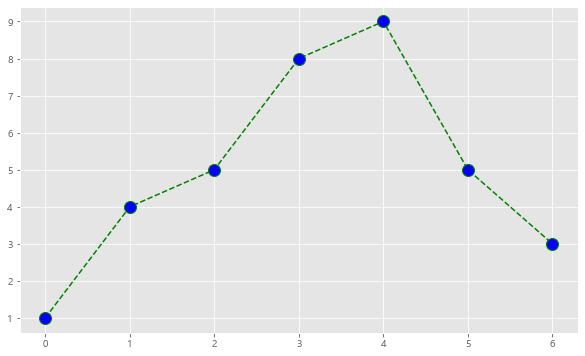

In [100]:
plt.figure(figsize=(10, 6))
plt.plot(t, y, color = 'green', linestyle = 'dashed', 
         marker = 'o', markerfacecolor = 'blue', markersize = 12)
plt.show()

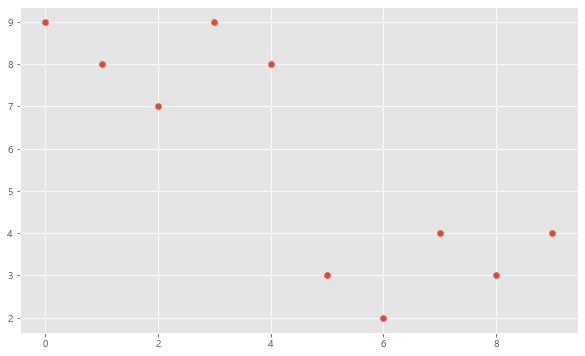

In [101]:
t = np.array([0,1,2,3,4,5,6,7,8,9])
y = np.array([9,8,7,9,8,3,2,4,3,4])
plt.figure(figsize=(10,6))
plt.scatter(t,y)
plt.show()

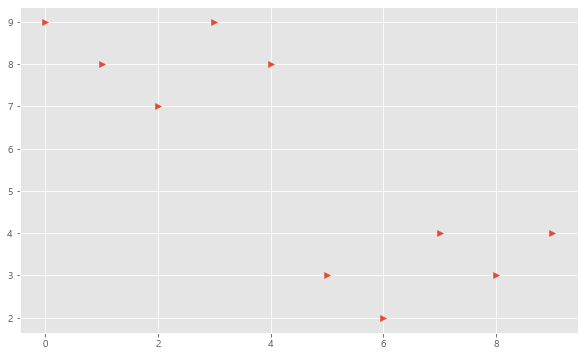

In [102]:
plt.figure(figsize=(10,6))
plt.scatter(t,y, marker='>')
plt.show()

In [103]:
s1 = np.random.normal(loc=0, scale=1, size = 1000)
s2 = np.random.normal(loc=5, scale=0.5, size = 1000)
s3 = np.random.normal(loc=10, scale=2, size = 1000)

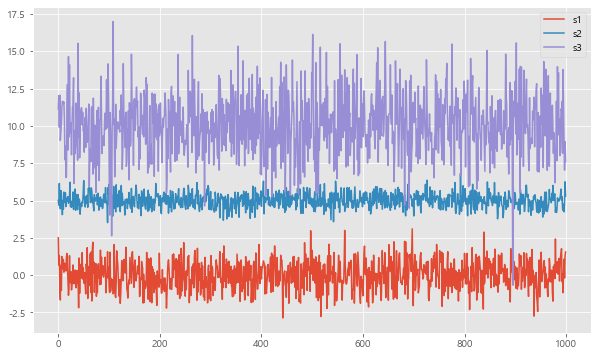

In [104]:
plt.figure(figsize=(10, 6))
plt.plot(s1, label = 's1')
plt.plot(s2, label = 's2')
plt.plot(s3, label = 's3')
plt.legend(loc = 0)
plt.show()

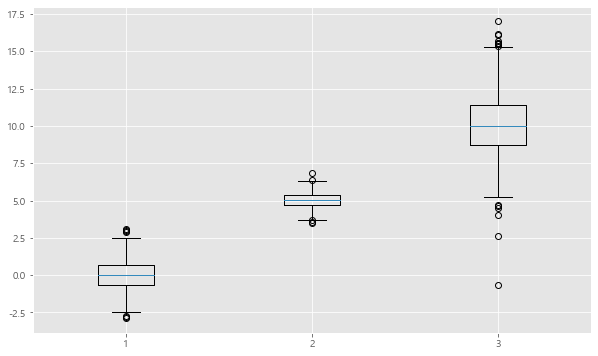

In [105]:
plt.figure(figsize=(10, 6))
plt.boxplot((s1, s2, s3))
plt.show()

In [106]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


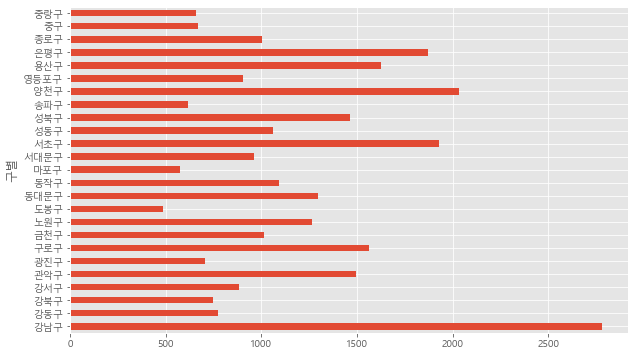

In [107]:
data_result['소계'].plot(kind='barh', grid = True, figsize = (10, 6))
plt.show()

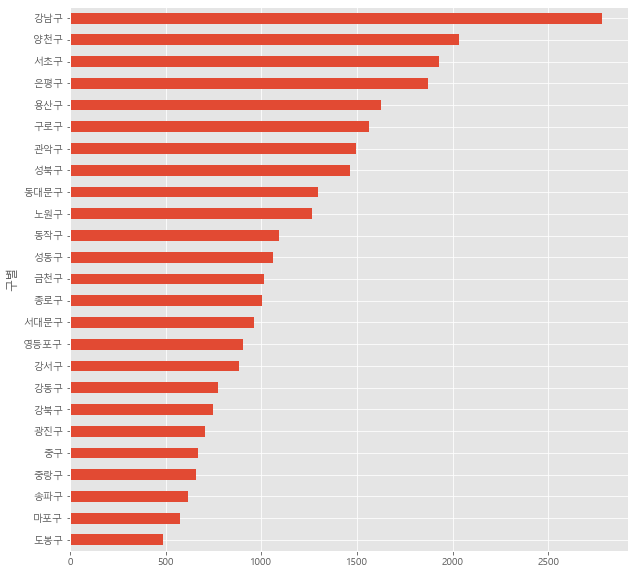

In [108]:
data_result['소계'].sort_values().plot(kind='barh', grid=True, figsize=(10, 10))

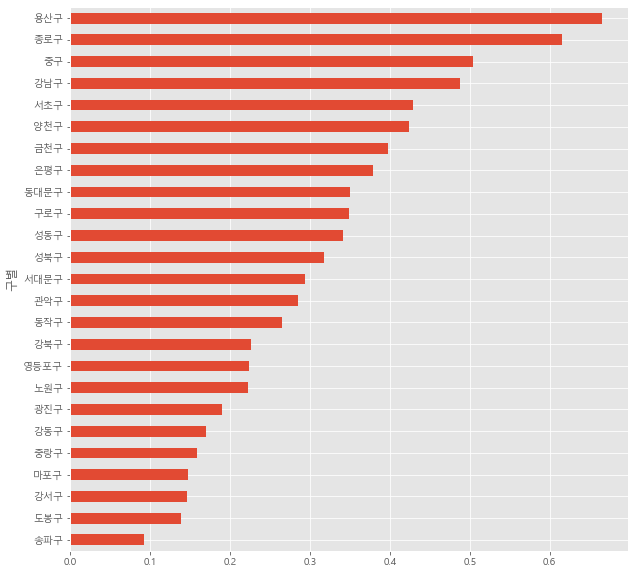

In [109]:
data_result['CCTV비율'] = data_result['소계']/data_result['인구수'] * 100
data_result['CCTV비율'].sort_values().plot(kind='barh', grid=True, figsize=(10, 10))
plt.show()

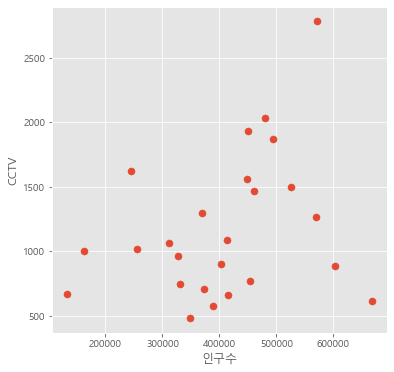

In [110]:
plt.figure(figsize=(6, 6))
plt.scatter(data_result['인구수'], data_result['소계'], s= 50)
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.show()

In [111]:
fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1)
fp1

array([1.30916415e-03, 6.45066497e+02])

In [112]:
f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

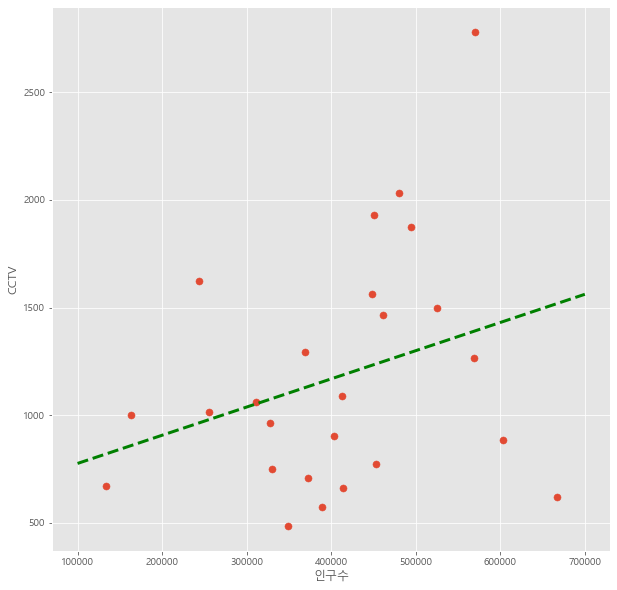

In [113]:
plt.figure(figsize=(10, 10))
plt.scatter(data_result['인구수'], data_result['소계'], s= 50)
plt.plot(fx, f1(fx), ls='dashed', lw= 3, color= 'g')
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.show()

In [114]:
fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1)

f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 1000)

data_result['오차'] = np.abs(data_result['소계']- f1(data_result['인구수']))

df_sort = data_result.sort_values(by = '오차', ascending=False)
df_sort.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.487292,1388.055355
송파구,618,104.347826,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599,0.092587,900.911312
양천구,2034,34.671731,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964,0.423769,760.563512
서초구,1930,63.371266,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308,0.428594,695.403794
용산구,1624,53.216374,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427,0.665020,659.231690


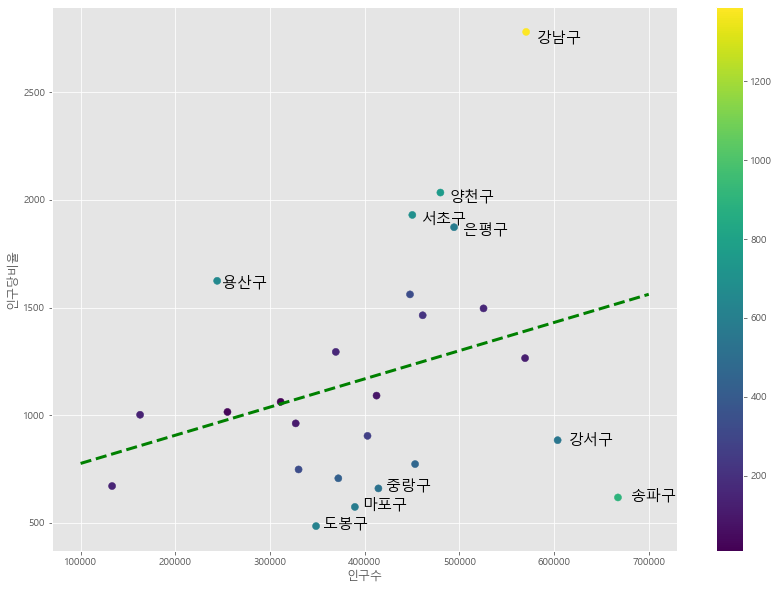

In [115]:
plt.figure(figsize=(14, 10))
plt.scatter(data_result['인구수'], data_result['소계'],
           c=data_result['오차'], s = 50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color = 'g')

for n in range(10):
    plt.text(df_sort['인구수'][n]*1.02, df_sort['소계'][n]*0.98, df_sort.index[n], fontsize = 15)
plt.xlabel('인구수')
plt.ylabel('인구당비율')
plt.colorbar()
plt.show()